In [15]:
import warnings as warn
import numpy as np
import matplotlib.pyplot as plt
import os
warn.filterwarnings('ignore')


In [16]:
#counting number of images in respective classes 
#0-Healthy Brain
#1-Tumor Brain
warn.filterwarnings('ignore')
def numberOfImages(path):
    trainingDirectory = f"./{path}"
    imagesCount = {}

#Iterating over folders present in "training" folder and marking the count of images in the particular folder 
    for dir in os.listdir(trainingDirectory):
        imagesCount[dir] = len(os.listdir(os.path.join(trainingDirectory,dir)))
    print (f"{path} images {imagesCount.items()}")

numberOfImages("Training")
numberOfImages("Validation")
numberOfImages("Testing") 


Training images dict_items([('Healthy', 1285), ('Tumor', 1290)])
Validation images dict_items([('Healthy', 405), ('Tumor', 350)])
Testing images dict_items([('Healthy', 310), ('Tumor', 300)])


In [17]:
# Model building(CNN ie Convolutional Neural Network)
# using keras that is underlying framework of tensorflow
# Conv2d (convolutional layer 2d because images are 2d vector)
# MaxPool2D (Downsamples the feature map, reducing computational load)
# Dropout (inorder to avoid overfitting we have to dropout some data ie we get a perfect matrix)
# Flatten (The perfect matrix pass through this layer to be flatten)
# Dense (Data from Flatten layer pass through Dense layer ie multi-layer perceptron or dense neural network)
# sequential (we have to provide inputs one after the another)
# ImageDataGenerator( image data augmentation during training of deep neural networks)
# load_img(to load image)
# img_to_array(to convert image to vector)
# binary_crossentropy(Loss function we are using)
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten,Dense, BatchNormalization,GlobalAveragePooling2D
from keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.losses import binary_crossentropy
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model

model = Sequential()
# We are using ReLu(Rectified Linear Unit) and sigmoid activation function

# (In a convolutional layer, a filter (also known as a kernel) is a small matrix of weights 
# that is used to extract features from the input image. Filters are central to the functioning 
# of convolutional neural networks (CNNs) and play a key role in feature detection)
model.add(Conv2D(filters= 16, kernel_size= (3,3),activation= 'relu', input_shape= (224,224,3),padding="same"))
model.add(Conv2D(filters= 32, kernel_size= (3,3),activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))


model.add(Conv2D(filters= 64, kernel_size= (3,3),activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters= 128, kernel_size= (3,3),activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))


model.add(Conv2D(filters= 256, kernel_size= (3,3),activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters= 512, kernel_size= (3,3),activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters= 1024, kernel_size= (3,3),activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Dropout(rate= 0.5)) #Retaining 50% data

model.add(Flatten())
model.add(Dense(units=64, activation= "relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(units= 1, activation="sigmoid")) # output layer contains only one perceptron
model.summary() # we get millions of parameters that are to be trained

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 3, 3, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,358,049 (24.25 MB)

 Trainable params: 6,358,049 (24.25 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam', loss= binary_crossentropy, metrics=['accuracy'])
#ADAM(Adaptive Moment Estimation)

In [19]:
# Preparing our data using Data Generator
# (The keras.preprocessing.image.ImageDataGenerator class is used in Keras, a popular deep learning
# library,for image data augmentation(the process of artificially increasing the size of a training 
# dataset by applying various transformations to the existing images))
def preprocessingImagesTraining(path):
    """input : path
       output : preprocessed images
    """
    image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/255,
                                    horizontal_flip= True)
    image = image_data.flow_from_directory(directory= path, target_size = (224,224),
                                           batch_size= 32, class_mode= "binary")
    return image

def preprocessingImagesValidationTesting(path):
    """input : path
       output : preprocessed images
    """
    image_data = ImageDataGenerator(rescale= 1/255)
    image = image_data.flow_from_directory(directory= path, target_size = (224,224),batch_size= 32, class_mode= "binary")
    return image


train_data = preprocessingImagesTraining("./Training")
val_data = preprocessingImagesValidationTesting("./Validation")
test_data = preprocessingImagesValidationTesting("./Testing")

Found 2575 images belonging to 2 classes.
Found 755 images belonging to 2 classes.
Found 610 images belonging to 2 classes.


In [20]:
# Early Stopping (While training model, sometimes the result can come early so we will stop before
# execution of all parameters) and model checkpoints

earlystopping = EarlyStopping(monitor= "val_accuracy", min_delta= 0.01, patience= 5, 
                              verbose= 1 ,mode="auto")

modelcheckpoint = ModelCheckpoint(monitor= "val_accuracy", filepath= "./bestmodel.keras",verbose= 1,
                     save_best_only= True, mode= "auto")
cd = [earlystopping,modelcheckpoint]

In [21]:
#Model Training
hs = model.fit(train_data, steps_per_epoch= 8, epochs= 30, verbose= 1
                              , validation_data= val_data, validation_steps= 16, 
                              callbacks= cd)
# the best accuracy over training data and validation data, and the lowest loss of training and
# validation data will be saved at particular epoch

training_accuracy = hs.history['accuracy'][-1]  # Last epoch's training accuracy ie latest one
validation_accuracy = hs.history['val_accuracy'][-1]  # Last epoch's validation accuracy ie latest one

print(f"Latest Training Accuracy: {training_accuracy * 100:.2f}%")
print(f"Latest Validation Accuracy: {validation_accuracy * 100:.2f}%")


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5217 - loss: 0.6985
Epoch 1: val_accuracy improved from -inf to 0.55469, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.5237 - loss: 0.6969 - val_accuracy: 0.5547 - val_loss: 0.7805
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5360 - loss: 0.7164
Epoch 2: val_accuracy improved from 0.55469 to 0.60494, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.5398 - loss: 0.7143 - val_accuracy: 0.6049 - val_loss: 0.6850
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6398 - loss: 0.6755
Epoch 3: val_accuracy improved from 0.60494 to 0.67773, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 47s 6s/step - accuracy: 0.6347 - loss: 0.6742 - val_accuracy: 0.6777 - val_loss: 0.6144
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8023 - loss: 0.5573
Epoch 4: val_accuracy did not improve from 0.67773
8/8 ━━━━━━━━━━━━━━━

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


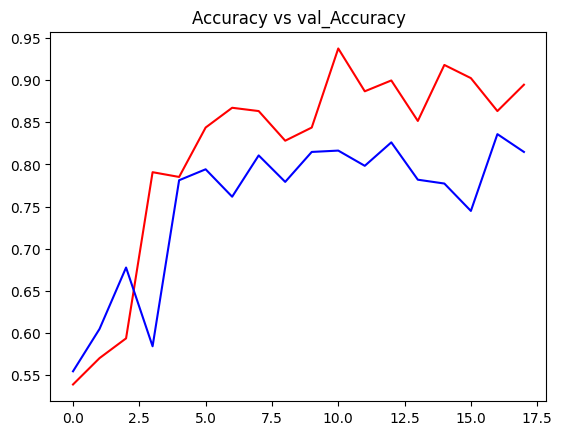

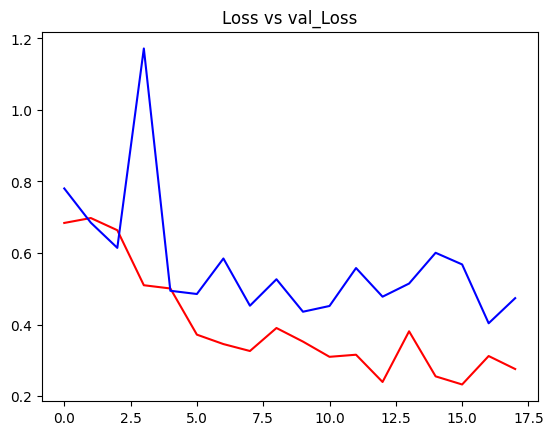

In [22]:
#Model Graphical Interpretation

h = hs.history
print(h.keys())

plt.plot(h["accuracy"],c= "red")
plt.plot(h["val_accuracy"],c="blue")
plt.title("Accuracy vs val_Accuracy")
plt.show()

plt.plot(h["loss"],"red")
plt.plot(h["val_loss"],c="blue")
plt.title("Loss vs val_Loss")
plt.show()

In [23]:
#Model Accuracy
model = load_model("./bestmodel.keras")
# Evaluate the best model on the training data
train_accuracy = model.evaluate(train_data)[1]
print(f"Best Model Accuracy on Training Data: {train_accuracy * 100:.2f}%")

# Evaluate the best model on the validation data
val_accuracy = model.evaluate(val_data)[1]
print(f"Best Model Accuracy on Validation Data: {val_accuracy * 100:.2f}%")
accuracy = model.evaluate(test_data)[1]
print(f"Best Model Accuracy on Testing Data: {accuracy*100 :.2f}%")

81/81 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.9042 - loss: 0.2314
Best Model Accuracy on Training Data: 90.99%
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 799ms/step - accuracy: 0.8502 - loss: 0.3612
Best Model Accuracy on Validation Data: 82.91%
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 765ms/step - accuracy: 0.8728 - loss: 0.3575
Best Model Accuracy on Testing Data: 89.02%


In [24]:
def brainPrediction(path):
    image = load_img(path,target_size=(224,224)) 
    input_array = img_to_array(image)/255 # To normalize divide by 255

    plt.imshow(input_array)
    plt.show()

    input_array = np.expand_dims(input_array,axis=0)

    prediction = model.predict(input_array)[0][0]
    print(train_data.class_indices)

    if (round(prediction))==0:
        print("Brain is healthy")
    elif(round(prediction))==1:
        print("Brain is having tumor")


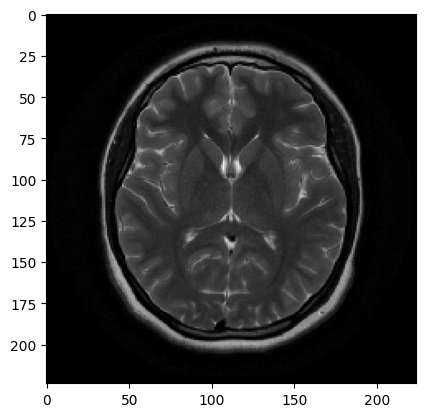

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
{'Healthy': 0, 'Tumor': 1}
Brain is healthy


In [25]:
brainPrediction("Testing\Healthy\Tr-no_0011.jpg") #Healthy Brain

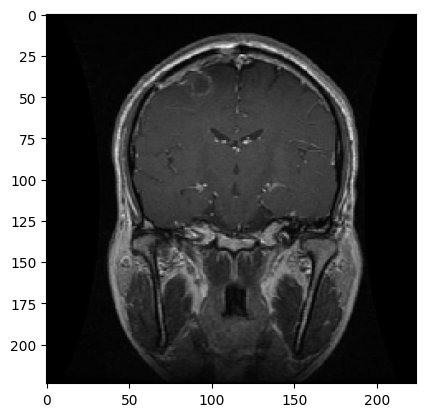

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
{'Healthy': 0, 'Tumor': 1}
Brain is having tumor


In [26]:
brainPrediction("Testing\Tumor\Tr-gl_0117.jpg") #Tumor brain

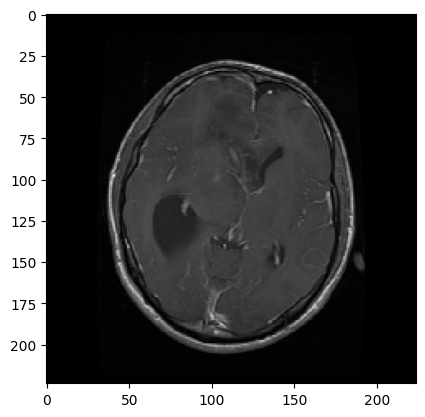

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
{'Healthy': 0, 'Tumor': 1}
Brain is having tumor


In [27]:
brainPrediction("Testing/Tumor/Tr-gl_0275.jpg") #Tumor brain

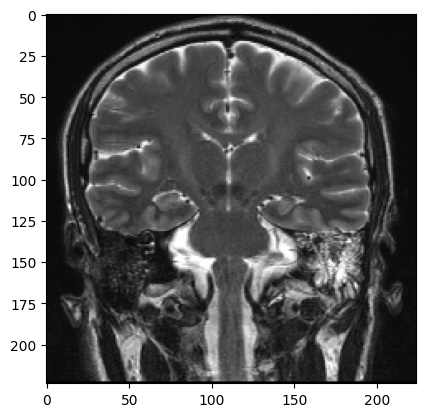

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
{'Healthy': 0, 'Tumor': 1}
Brain is healthy


In [28]:
brainPrediction("Testing\Healthy\Tr-no_0193.jpg") #Healthy brain